In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [9]:
my = pd.read_csv('./maoyan_10.csv')
display(my.shape,my.head())

(90, 10)

,Unnamed: 0,哪吒之魔童降世,流浪地球,战狼2,红海行动,美人鱼,速度与激情8,唐人街探案2,我不是药神,西虹市首富
0,0,48.2,--,--,--,--,--,0,0.5,--
1,1,71.7,3.2,20,--,--,--,--,0.4,0.1
2,2,3.5,--,2.9,0,--,0,0,3.4,35.9
3,3,122.2,--,6.4,--,--,6270.6,--,0.2,0.1
4,4,220.2,--,5.6,1.5,--,41707.2,--,0.0,22713.1


In [10]:
my.drop('Unnamed: 0',axis=1,inplace=True)
my.head()

,哪吒之魔童降世,流浪地球,战狼2,红海行动,美人鱼,速度与激情8,唐人街探案2,我不是药神,西虹市首富
0,48.2,--,--,--,--,--,0,0.5,--
1,71.7,3.2,20,--,--,--,--,0.4,0.1
2,3.5,--,2.9,0,--,0,0,3.4,35.9
3,122.2,--,6.4,--,--,6270.6,--,0.2,0.1
4,220.2,--,5.6,1.5,--,41707.2,--,0.0,22713.1


In [11]:
my = my.replace('--',0)
my.head()

,哪吒之魔童降世,流浪地球,战狼2,红海行动,美人鱼,速度与激情8,唐人街探案2,我不是药神,西虹市首富
0,48.2,0,0,0,0,0,0,0.5,0
1,71.7,3.2,20,0,0,0,0,0.4,0.1
2,3.5,0,2.9,0,0,0,0,3.4,35.9
3,122.2,0,6.4,0,0,6270.6,0,0.2,0.1
4,220.2,0,5.6,1.5,0,41707.2,0,0.0,22713.1


In [12]:
my.dtypes

哪吒之魔童降世    float64
流浪地球        object
战狼2         object
红海行动        object
美人鱼         object
速度与激情8      object
唐人街探案2      object
我不是药神      float64
西虹市首富       object
dtype: object

In [16]:
my['唐人街探案2']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
85    NaN
86    NaN
87    NaN
88    NaN
89    NaN
Name: 唐人街探案2, Length: 90, dtype: float64

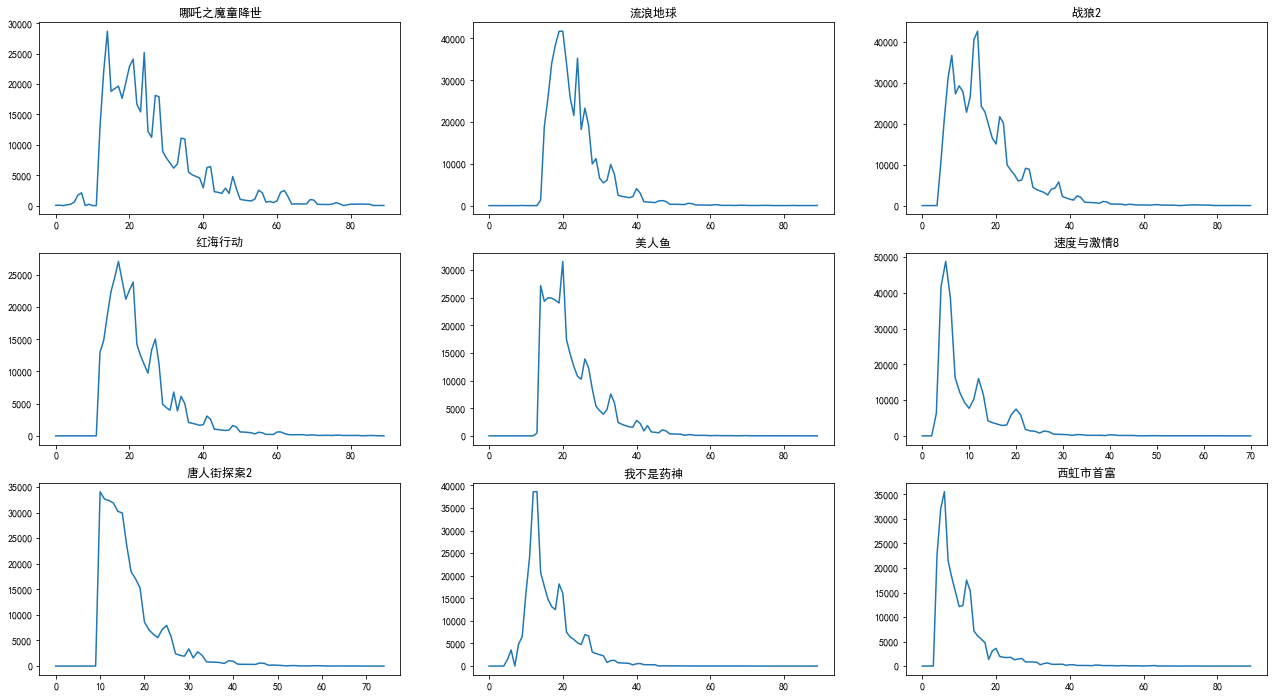

In [17]:
name = my.columns.tolist()
plt.figure(figsize=(22,12))
plt.xlabel('天数',fontsize=15)
plt.ylabel('票房(万)')

for i in range(9):
    plt.subplot(3, 3, i+1)
    y = my[name[i]].dropna().tolist()
    x = [i for i in range(len(y))]
    plt.title(name[i])
    plt.plot(x,y)
plt.show()

In [18]:
my['西虹市首富'] = my['西虹市首富'].astype(np.float64)
my['流浪地球'] = my['流浪地球'].astype(np.float64)
my['战狼2'] = my['战狼2'].astype(np.float64)
my['红海行动'] = my['红海行动'].astype(np.float64)
my['美人鱼'] = my['美人鱼'].astype(np.float64)
my['唐人街探案2'] = my['唐人街探案2'].astype(np.float64)
my['速度与激情8'] = my['速度与激情8'].astype(np.float64)
my['哪吒之魔童降世'] = my['哪吒之魔童降世'].astype(np.float64)
my['我不是药神'] = my['我不是药神'].astype(np.float64)
my.dtypes

哪吒之魔童降世    float64
流浪地球       float64
战狼2        float64
红海行动       float64
美人鱼        float64
速度与激情8     float64
唐人街探案2     float64
我不是药神      float64
西虹市首富      float64
dtype: object

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


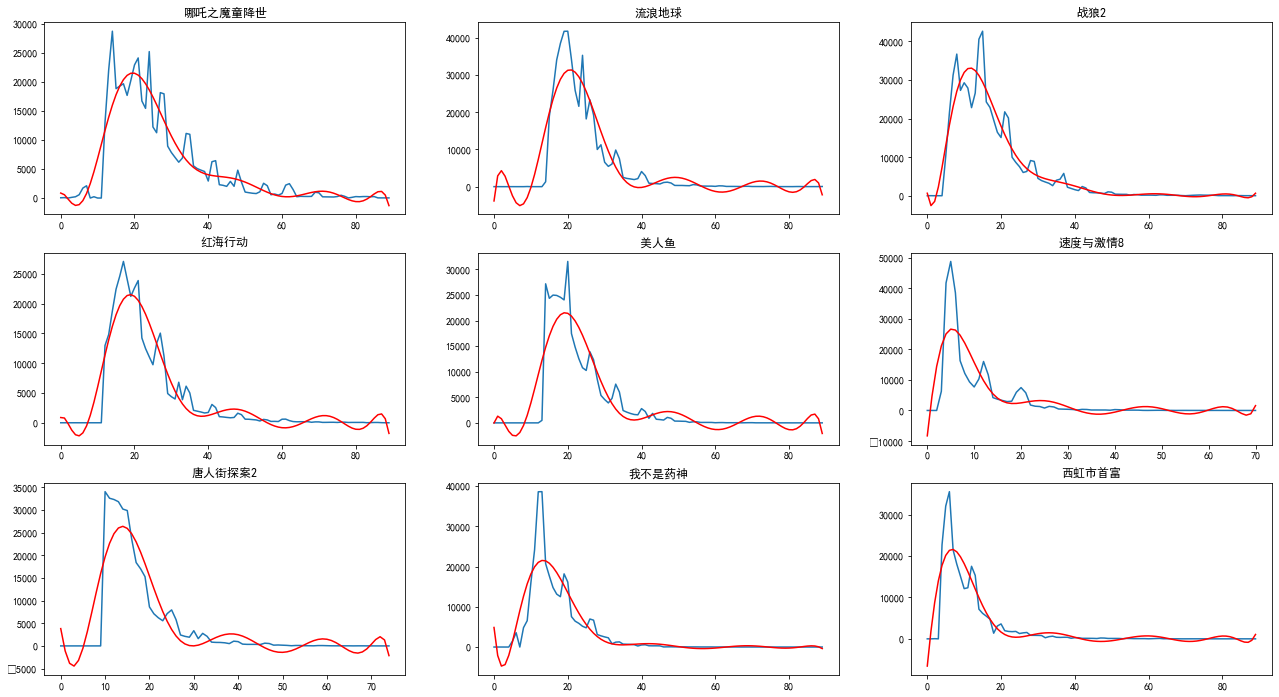

In [19]:
def draw_fit(my):
    x = np.array(range(len(my)))
    # print(np.polyfit(x,my,10))
    z = np.poly1d(np.polyfit(x,my,10))
    plt.plot(x,z(x), 'r-')
    return z

plt.figure(figsize=(22,12))
func_fits = []

for i in range(9):
    plt.subplot(3, 3, i+1)
    y = my[name[i]].dropna().tolist()
    x = [i for i in range(len(y))]
    plt.title(name[i])
    plt.plot(x,y)
    z = draw_fit(y)  # 绘制拟合曲线
    func_fits.append(z)
plt.show()

In [20]:
print(func_fits)

[poly1d([-2.35880346e-11,  1.07316632e-08, -2.07559753e-06,  2.21792908e-04,
       -1.42206044e-02,  5.54039947e-01, -1.25601034e+01,  1.45314934e+02,
       -5.86003683e+02,  1.63783896e+02,  8.57561528e+02]), poly1d([-6.26791774e-11,  2.92456471e-08, -5.82775150e-06,  6.45946993e-04,
       -4.34211182e-02,  1.80726049e+00, -4.54593269e+01,  6.40259275e+02,
       -4.29590635e+03,  1.04312950e+04, -3.83742480e+03]), poly1d([ 2.26629355e-11, -1.09521694e-08,  2.27893832e-06, -2.66652146e-04,
        1.92033783e-02, -8.73897282e-01,  2.47145936e+01, -4.05240432e+02,
        3.20350665e+03, -6.03062269e+03,  6.51388767e+02]), poly1d([-3.38563911e-11,  1.53744730e-08, -2.96623029e-06,  3.16010438e-04,
       -2.01963251e-02,  7.85081523e-01, -1.78430810e+01,  2.10898683e+02,
       -9.53213831e+02,  6.77219323e+02,  8.78071910e+02]), poly1d([-4.12887177e-11,  1.88434298e-08, -3.65950059e-06,  3.93411533e-04,
       -2.54754867e-02,  1.01081614e+00, -2.38045674e+01,  3.02546014e+02,
    

In [22]:
# 拟合函数
z = func_fits[0]
def func(x,p):
    A,k = p
    return A * z(x)
func(5,[1,1])

-1133.5935274682301

In [23]:
# 误差函数
def residuals(p,y,x):
    return y - func(x,p)

In [26]:
# 读取新数据
data_nz = pd.read_csv('demo_movi.csv',sep=',',encoding='utf8')
title = data_nz.columns.tolist()
y2 = data_nz[title[1]].dropna().tolist()
x2 = np.array(range(len(y2)))

In [27]:
y2

[4.2,
 4.4,
 1.5,
 7.9,
 1.3,
 2.1,
 8.2,
 1.5,
 0.7,
 0.2,
 2.7,
 7.1,
 1.2,
 0.5,
 1.8,
 3.0,
 1.9,
 2.3,
 12.6,
 1036.6,
 5.7,
 17.4,
 2326.6,
 4082.3,
 5141.1,
 6296.3,
 7970.5,
 9978.7,
 11304.0,
 11295.2,
 5874.3,
 5798.3,
 8484.1,
 10881.1,
 4332.5,
 4099.4,
 3671.1,
 3364.9,
 3678.4,
 5817.4,
 4790.8,
 2008.7,
 1860.8,
 1643.4,
 1480.5,
 1772.7,
 3137.2,
 2490.1,
 988.8,
 936.8,
 862.0,
 807.5,
 838.1,
 1514.7,
 1127.4,
 450.1,
 362.2,
 248.5,
 245.4,
 100.0,
 207.9,
 180.6,
 73.9,
 76.1,
 84.3,
 64.6,
 20.9,
 50.3,
 47.9,
 21.5,
 25.3,
 23.7,
 17.5,
 5.9,
 15.1,
 13.7,
 6.2,
 6.3,
 4.0,
 3.6,
 3.6,
 6.8,
 5.7,
 2.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [28]:
residuals([1,1],y2,x2)

array([-8.53361528e+02, -5.64236611e+02,  1.81980571e+02,  9.02148549e+02,
        1.26730258e+03,  1.13569353e+03,  4.50489491e+02, -7.84408943e+02,
       -2.47662031e+03, -4.52651578e+03, -6.81048772e+03, -9.20524800e+03,
       -1.16041954e+04, -1.38850392e+04, -1.59604170e+04, -1.77604998e+04,
       -1.92351309e+04, -2.03475109e+04, -2.10744960e+04, -2.04140484e+04,
       -2.14508413e+04, -2.11152928e+04, -1.81896747e+04, -1.55688176e+04,
       -1.34441112e+04, -1.10720754e+04, -8.07966290e+03, -4.69933439e+03,
       -1.99183273e+03, -6.47370922e+02, -4.77723584e+03, -3.65140051e+03,
        1.26670438e+02,  3.49264468e+03, -2.21759705e+03, -1.74429142e+03,
       -1.59409944e+03, -1.44105335e+03, -7.75106087e+02,  1.62485386e+03,
        7.84958341e+02, -1.86647937e+03, -1.92146637e+03, -2.06616600e+03,
       -2.16054243e+03, -1.79009276e+03, -3.26349604e+02, -8.44941978e+02,
       -2.18340678e+03, -2.03644829e+03, -1.87754785e+03, -1.66793056e+03,
       -1.34970075e+03, -

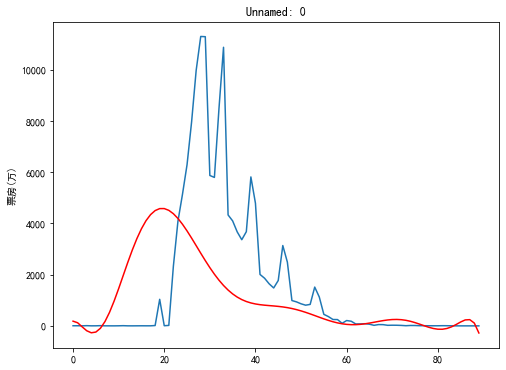

总票房估计:99510 万


In [33]:
# 最小二乘法
from scipy.optimize import leastsq
p0 = [1,1]
plsq = leastsq(residuals,p0,args=(y2,x2))
x3 = np.array(range(len(y2)))
plt.figure(figsize=(8,6))
plt.xticks()
plt.xlabel('',fontsize=14)
plt.ylabel('票房(万)')

plt.title(title[0])
plt.plot(x2,y2)

y3 = func(x3,plsq[0])
plt.plot(x3,y3,'r-')
plt.show()
print('总票房估计:%.f 万'%np.sum(y3))